<a href="https://colab.research.google.com/drive/1HJhyPwhf4uBJt4zbk2BwfXoVU_6mpmfW?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fresh fruit for you Project

* 썩거나 상한과일과 신선한과일을 분류할 수 있는 노트북입니다.
* 가상의 회사 (주)과일드림의 과일분류 작업효율 향상을 위하여 개발된 딥러닝 모델입니다.
* **현재까진 사과,바나나,귤만 가능합니다.**
* 실행하기전 런타임을 GPU로 맞춘다면 더 나은속도와 성능이 보장됩니다. 
  * Runtime >> Change Runtime Type >> GPU




# Instructions
* Ctrl+f9를 이용하여 모두 실행하거나, Step옆의 image.png 버튼을 눌러서 진행할 수 있습니다.
* 집에 있는사과,바나나,귤 사진도 가능하며, 네이버,구글에서 임의로 캡쳐해서 시도해도 좋습니다.

In [20]:
%%capture
#@title Step 1: 모델구동을 위한 colab 환경설정
#@markdown git clone을 이용하여 모델과 requirements.txt를 불러온뒤 로드하는 과정입니다.

!git clone https://github.com/TaeyanG4/Fresh_and_rotten_classification.git
!pip install -r ./Fresh_and_rotten_classification/requirements.txt

from keras.models import load_model
model_resnet=load_model('/content/Fresh_and_rotten_classification/rottenvsfresh_resnet_model.h5')

Saving 1.png to 1.png


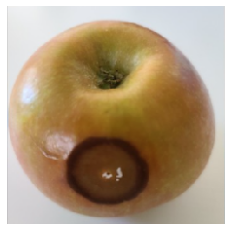

In [21]:
#@title Step 2: 이미지 업로드
#@markdown 검증하고자 하는 과일이미지를 업로드 하는과정입니다.<br>
#@markdown 검증하고자 하는파일이 없다면 sample폴더에서 랜덤으로 다운받아도 상관없습니다.<br>

import os
from google.colab import files
import io
import numpy as np
from tensorflow.keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
    # Load the image from the binary content
    img = image.load_img(io.BytesIO(uploaded[fn]), target_size=(224,224))
    
    # Show the image
    plt.imshow(img)
    plt.axis('off')
    plt.show()

1/1 [==============================] - 1s 1s/step
이 과일이미지는 썩거나 상한 사과 입니다.


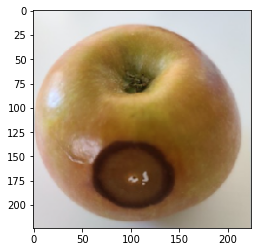

In [22]:
#@title Step 3: 이미지 검증
#@markdown 업로드한 이미지가 신선한 과일인지 썩은과일인지 판별하는 과정입니다.

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, decode_predictions, preprocess_input
import numpy as np
import random
import os
import matplotlib.pyplot as plt

for fn in uploaded.keys():
    # Load the image from the binary content
    img = image.load_img(io.BytesIO(uploaded[fn]), target_size=(224,224))
    
plt.imshow(img)

# Convert PIL Image to NumPy array
img_array = image.img_to_array(img)

# Preprocess the image
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Make the prediction
prediction = model_resnet.predict(img_array)

class_ind=np.argmax(prediction[0])

prediction = ''

if class_ind==0:
    prediction = '신선한 사과'
elif class_ind==1:
    prediction = '신선한 바나나'
elif class_ind==2:
    prediction = '신선한 귤'
elif class_ind==3:
    prediction = '썩거나 상한 사과'
elif class_ind==4:
    prediction = '썩거나 상한 바나나'
elif class_ind==5:
    prediction = '썩거나 상한 귤'

print(f"이 과일이미지는 {prediction} 입니다.")